In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# initialize the label name
labelNames = ["top", "trouser", "pullover", "dress", "coat", 
              "sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [3]:
# flatten 28*28 images to a 784 vector for each image
width = height = 28
num_pixels = width * height
trainX = trainX.reshape(60000, num_pixels).astype('float32') / 255.0
testX = testX.reshape(10000, num_pixels).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
valX = trainX[50000:]
valY = trainY[50000:]
trainX = trainX[:50000]
trainY = trainY[:50000]

# one hot encode outputs
num_classes = 10
trainY = tf.keras.utils.to_categorical(trainY, num_classes)
valY = tf.keras.utils.to_categorical(valY, num_classes)
testY = tf.keras.utils.to_categorical(testY, num_classes)

print ('train shape: \t', trainX.shape)
print ('valid shape: \t', valX.shape)
print ('test shape: \t', testX.shape)

train shape: 	 (50000, 784)
valid shape: 	 (10000, 784)
test shape: 	 (10000, 784)


### CNN(Convolutional Neural Network) 
![CNN](../data/CNN.JPG "CNN")

### 중요! 입력 데이터의 형태가 바뀌어야 한다!!!!
### 784 (1D) -> 28x28 (2D)

In [4]:
# reshape to be [samples][pixels][width][height]
trainX = trainX.reshape(50000, 28, 28, 1)
valX = valX.reshape(10000, 28, 28, 1)
testX = testX.reshape(10000, 28, 28, 1)

print ('train shape: \t', trainX.shape)
print ('valid shape: \t', valX.shape)
print ('test shape: \t', testX.shape)

train shape: 	 (50000, 28, 28, 1)
valid shape: 	 (10000, 28, 28, 1)
test shape: 	 (10000, 28, 28, 1)


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def simple_cnn_model():
    # create model    
    model = Sequential()
    
    # Convolution: 특정한 패턴의 특징이 어디서 나타나는 확인하는 도구 
    # feature map: 이미지와 필터를 컨벌루션한 결과 이미지
    # Conv2D: 필터로 특징을 추출
    model.add(Conv2D(32, (5,5), input_shape=(28, 28, 1), activation='relu')) # 32: 출력되는 feature map 개수, (5,5): kernel size, input_shape=(28, 28, 1): (행, 열, 채널 수)로 정의합니다. 흑백영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정합니다.
    
    # pooling(sub sampling)
    # Max Pooling : 정해진 filter크기 안에서 가장 큰 값만 뽑아낸다.
    # Pooling의 목적: 1.  input size를 줄임 2. overfitting을 조절 3.특징을 잘 뽑아냄.
    # MaxPooling2D: 영상에서의 사소한 변화가 특징 추출에 크게 영향을 미치지 않도록 합니다.
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #  플래튼(Flatten) 레이어: 영상을 1차원으로 변환 후 Dense layer에 전달
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True) # lr(learning rate): Gradient의 방향으로 얼마나 빠르게 이동할지 결정
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 0.5597 - acc: 0.7975 - val_loss: 0.4398 

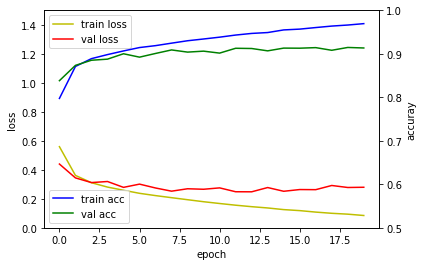

2D simple CNN error: 9.40%


In [7]:
# build the model
model = simple_cnn_model()
model.summary()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('simple_cnn_model.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("2D simple CNN error: %.2f%%" % (100-scores[1]*100))

### STEP 12: Convolution kernel 살펴보기 (5x5)

(5, 5, 32)


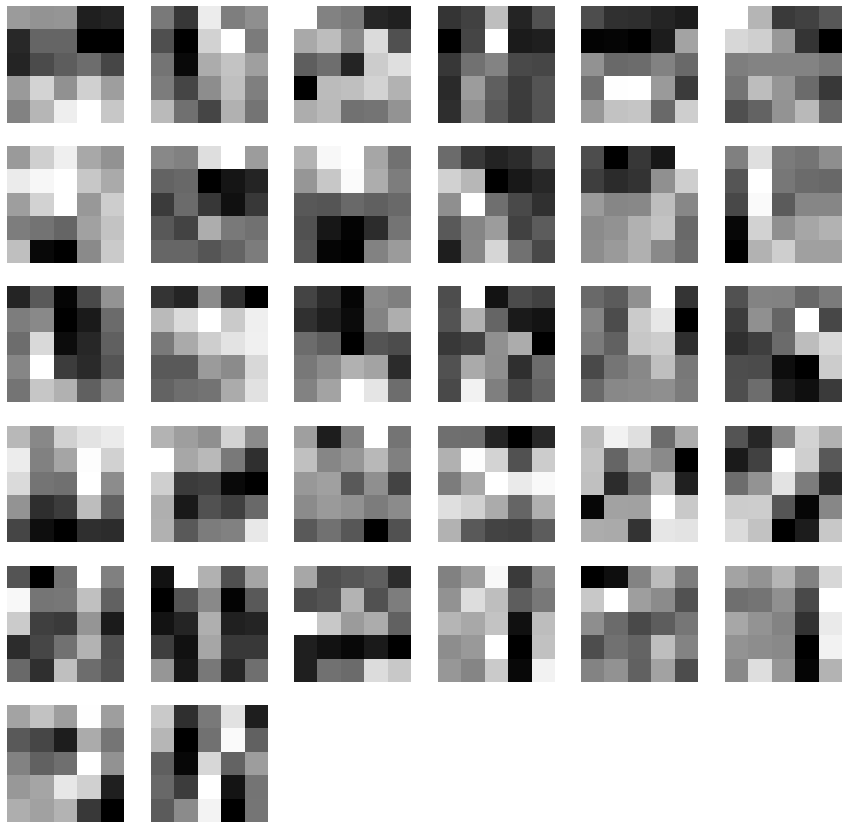

In [8]:
W1 = model.layers[0].get_weights()[0]
W1 = np.squeeze(W1)

print(W1.shape)
W1 = np.transpose(W1, (2,0,1))

plt.figure(figsize=(15, 15), frameon=False)
for ind, val in enumerate(W1):
    plt.subplot(6, 6, ind + 1)
    im = val.reshape((5,5))
    plt.axis("off")
    plt.imshow(im, cmap='gray',interpolation='nearest')

(3, 12, 12, 32)


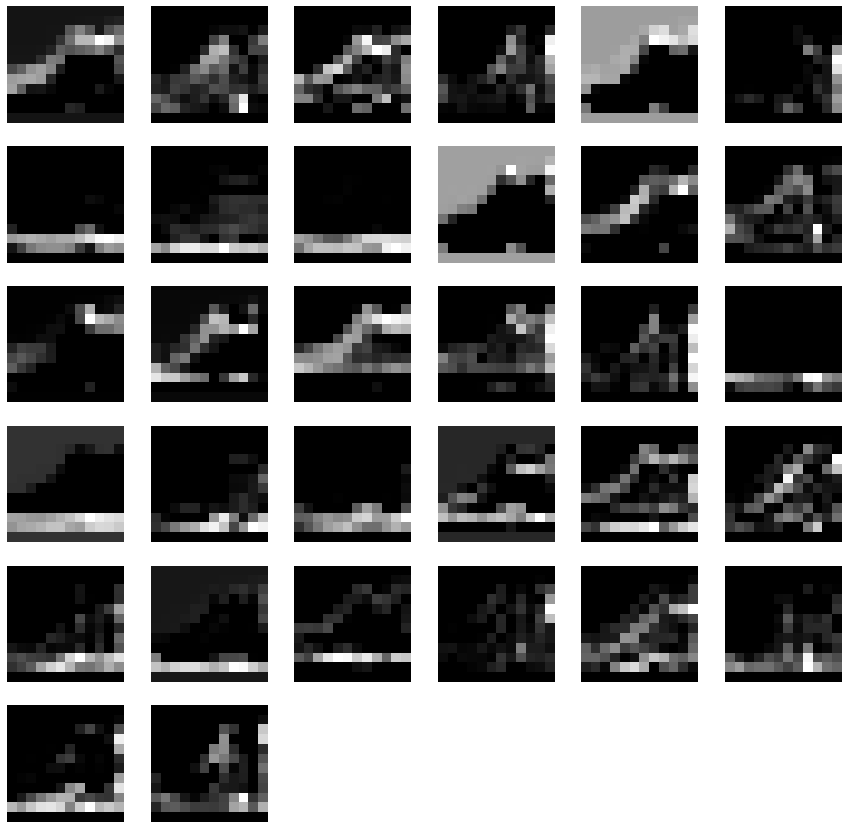

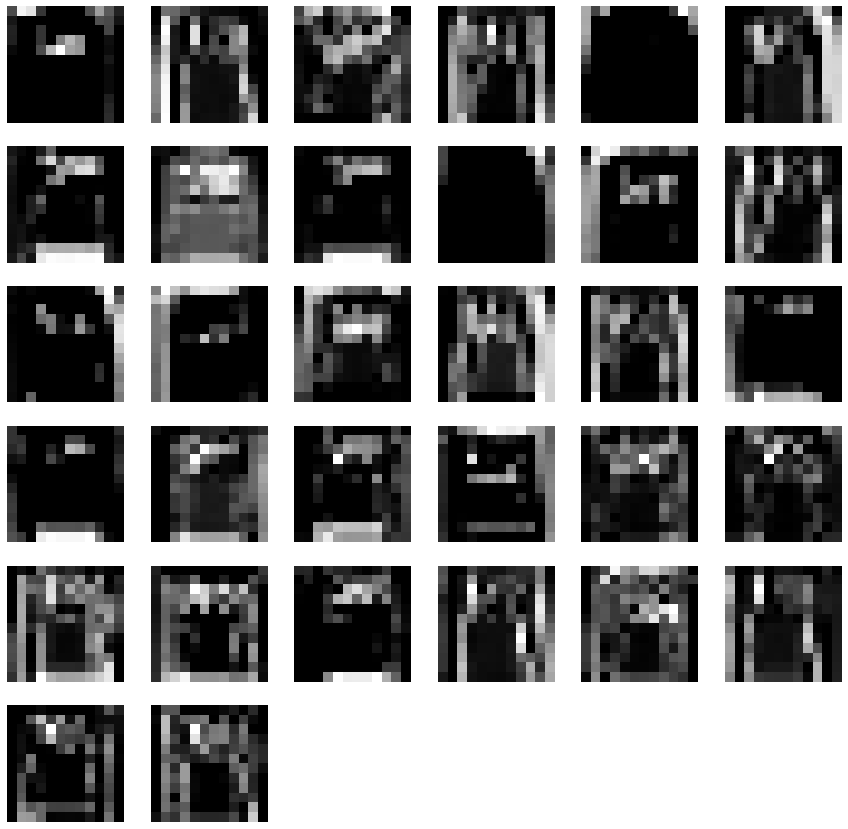

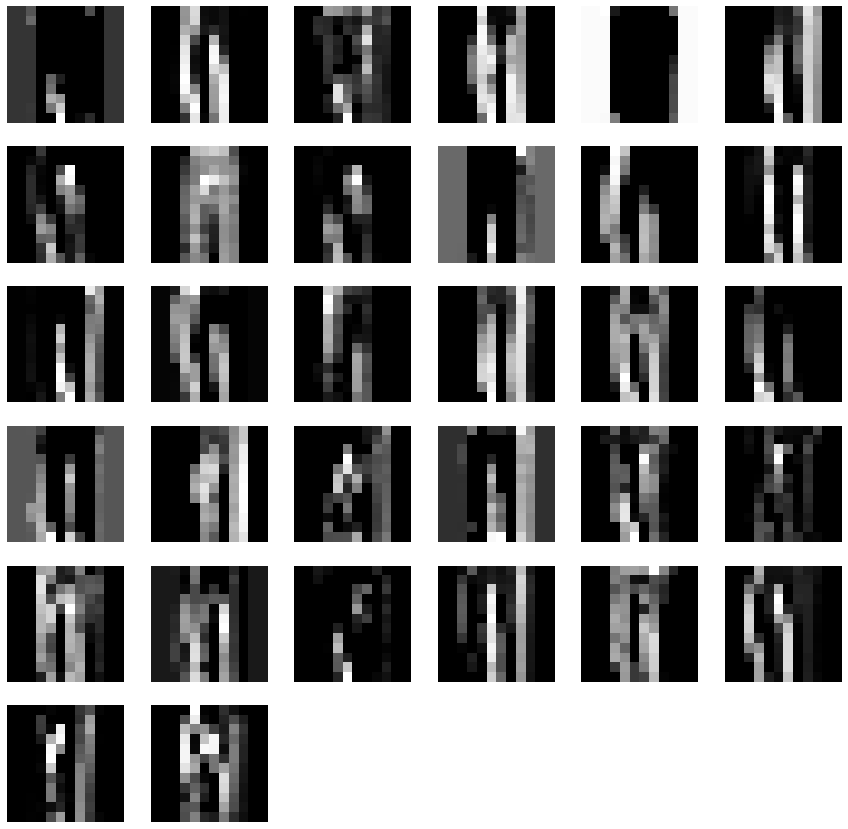

In [9]:
import tensorflow.keras.backend as K

convout1_f = K.function([model.layers[0].input], [model.layers[1].output])

x_rep = convout1_f([testX[0:3]])
x_rep = np.squeeze(x_rep)

print(x_rep.shape)

for this_x_rep in x_rep:
    plt.figure(figsize=(15, 15), frameon=False)
    
    for i in range (this_x_rep.shape[2]):
        val = this_x_rep[:,:,i]
        plt.subplot(6, 6, i + 1)
        plt.axis("off")
        plt.imshow(val, cmap='gray',interpolation='nearest')

### STEP 13: 마지막 인공지능 모델 (VGG-like CNN)
![VGG-16](../data/VGG-16.png "VGG-16")

In [10]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

def cnn_model():
    # create model
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1)))
    # BatchNormalization: 평균과 분산을 조정하는 과정이 신경망 안에 포함되어 학습 시에 실행
    model.add(BatchNormalization())
    model.add(Activation(activation='relu')) # BatchNormalization의 출력에 활성화함수 적용?
    
    model.add(Conv2D(32, (3,3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, (3,3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    
    model.add(Conv2D(64, (3,3)))
    model.add(BatchNormalization())
    model.add(Activation(activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

Epoch 1/20
782/782 [==============================] - 31s 39ms/step - loss: 0.5685 - acc: 0.7927 - val_loss: 0.3705 - val_acc: 0.8616
Epoch 2/20
782/782 [==============================] - 31s 39ms/step - loss: 0.3839 - acc: 0.8620 - val_loss: 0.2929 - val_acc: 0.8906
Epoch 3/20
782/782 [==============================] - 31s 40ms/step - loss: 0.3292 - acc: 0.8808 - val_loss: 0.2677 - val_acc: 0.9018
Epoch 4/20
782/782 [==============================] - 31s 40ms/step - loss: 0.2984 - acc: 0.8935 - val_loss: 0.2539 - val_acc: 0.9085
Epoch 5/20
782/782 [==============================] - 31s 40ms/step - loss: 0.2711 - acc: 0.9017 - val_loss: 0.2774 - val_acc: 0.8959
Epoch 6/20
782/782 [==============================] - 32s 40ms/step - loss: 0.2530 - acc: 0.9097 - val_loss: 0.2395 - val_acc: 0.9143
Epoch 7/20
782/782 [==============================] - 32s 41ms/step - loss: 0.2356 - acc: 0.9149 - val_loss: 0.2264 - val_acc: 0.9154
Epoch 8/20
782/782 [==============================] - 33s 43ms

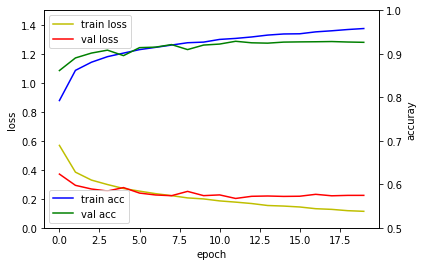

VGG-like CNN error: 7.73%


In [11]:
# build the model
model = cnn_model()
model.summary()

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit the model
hist = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=20, batch_size=64, verbose=1)
model.save('cnn_model.h5')

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.5, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("VGG-like CNN error: %.2f%%" % (100-scores[1]*100))

### STEP 14: 결과 확인하기 (틀린 것 들만)

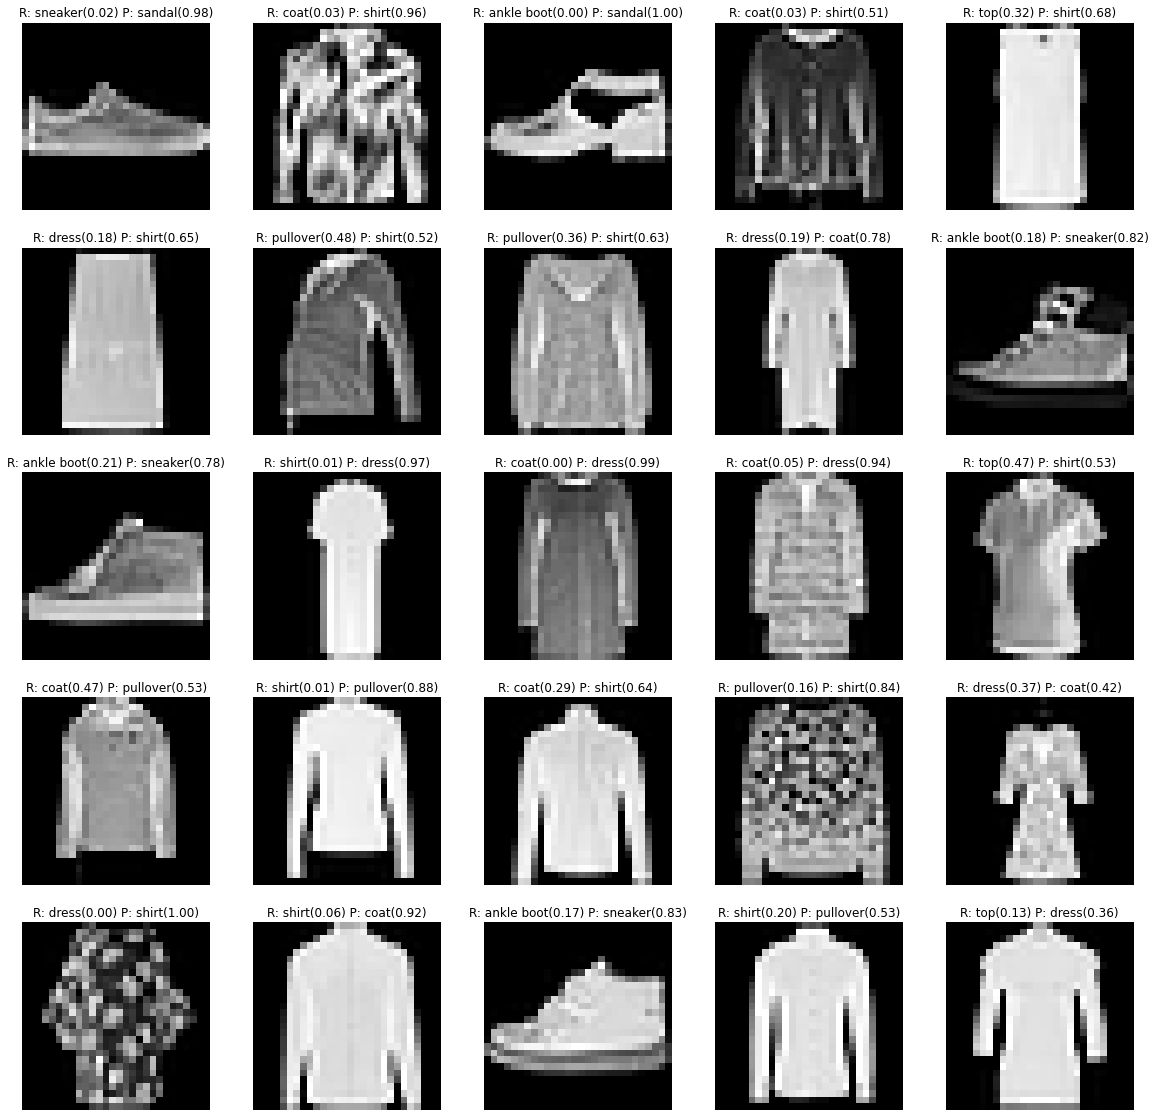

In [12]:
# 7. 모델 사용하기
yhat_test = model.predict(testX, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (20,20)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(testY[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[(int)(cnt/plt_row), cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(testX[i].reshape(width, height), cmap='gray')
    sub_plt_title = 'R: ' + labelNames[np.argmax(testY[i])] + '(%.2f)'% (yhat_test[i][np.argmax(testY[i])]) + ' P: ' + labelNames[np.argmax(yhat_test[i])] + '(%.2f)'% (  yhat_test[i][np.argmax(yhat_test[i])])
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()